# Workshop 1B: Linear Regression

## What you need to do before workshop 

Before you begin with the workshop exercises, it is important for you to complete all the activities of the first week of Module 3A. It will help you to understand and apply your learning. 

#### Optional

To refresh your Python skills, go to the 'course resources' section in the 'Welcome to the course' module.

## Guide to use Jupyter Notebook


### What is Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting programming exercises and assignments. 

A Jupyter Notebook consists of the code and its output into a single document. In a single document, you can combine visualisations, narrative text, mathematical equations, and codes to explain the exercise. You'll be able to run the code, display the output, and also add explanations, formulas, charts in a notebook and make the exercise more transparent, and understandable.


### What is .ipynb file?

Each .ipynb file is one Jupyter notebook and gets this .ipynb extension. If you create or download a new notebook, a new  .ipynb file will be created or downloaded. 


### Jupyter Notebook Interface

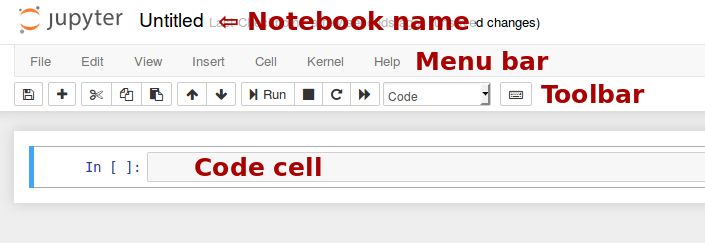



There are two fairly prominent terms that you should understand: cells and kernels. 

A kernel is a “computational engine” that executes the code contained in a notebook document.
A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.


### Cells

Cells form the body of a notebook. The notebook consists of a sequence of cells. For example, this notebook consists of many  cells. 

There are two main cell types that we will use in this module:

#### Code Cell

A code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.

#### Markdown Cell

A Markdown cell contains text formatted using Markdown and displays its output in-place when the Markdown cell is run.
Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).
The markdown cell will not give you any output if you run it as it is not a code cell.

#### Run a cell
To run a code cell, click on 'run' button on the toolbar or click cell on the menu bar and select run cells.


You can name a Jupyter Notebook by clicking on 'untitled' on the top of the notebook as shown in the screenshot above. Click on 'save' on the toolbar to save your work. You can download your notebook by clicking on 'file' in the menubar and download it as a notebook with .ipynb extension. 

## Let's get started

This week you learned about the concept of machine learning and its types. You covered linear regression as a simple method of implementing supervised learning.You also explored how to generalise a model to avoid underfitting or overfitting. Let's apply linear regression using Python. 

In this exercise, you'll build and evaluate a linear regression based machine learning model and the following are the steps:
1. Import the libraries.
2. Load input data (.csv file).
3. Pre-process data.
4. Create functions to calculate mean, variance, co-variance and estimate co-efficients and root mean squared error. To implement a simple linear regression model and evaluate it, firstly, you need to find  mean  variance, co-variance and co-efficients that you learned from the weekly activities. To do this, the functions to calculate all these parameters need to be written in Python.
5. Create a functions to implement a linear regression model, evaluate and viusalise the model. After developing all the functions, you'll use these functions to implement linear regression model on 'insurance' dataset and then evalaute and visualise the model.
6. Implement linear regression model on 'insurance' dataset. 
7. Evaluate the linear regression model on 'insurance' dataset. 
8. Visualise the linear regression model on 'insurance' dataset.

Note that a function is written in Python to perform each step listed above and returns a value(s) that can be used by another function as an input(s). The assessments are also designed in similar fashion where you'll complete the coding of the functions and ensure that the results are correct.

## 1. Import the needed libraries

The first step is to import the following Python libraries. 

In [1]:
from matplotlib import pyplot as plot
from random import seed
from random import randrange
import functions
from math import sqrt

## 2. Load data/dataset

Recall the steps to machine learning or supervised learning. Any machine learning algorithm needs input data to build a model. Thus,load a CSV file. 

In [2]:
def load_csv(filename, skip=False):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        if skip:
            next(csv_reader, None)
        for row in csv_reader:
            dataset.append(row)
    return dataset

## 3. Pre-process data: Convert string column to float
Let's pre-process the data. Currently, the rows in the dataset are in string format. So, we're converting the rows from string to float format. This will convert the string column into decimal number (float) and overwrite the data. Note that the function strip() will remove the white spaces from the data.

In [3]:
def string_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

## 4. Calculate the mean value of a list of numbers

$ \Large mean(x) = \frac {\sum _{i=1} x_{i}}{count(x)} $

Let's start with finding mean value of a list of numbers. Mean is the sum all the values divided by the number of values. The mean formula is written in Python below. The following code is returning mean using variable 'mean_results'.

In [4]:
def mean(values):
    # values: list([flotes])
    mean_value = sum(values) / float(len(values))
    return mean_value

## 5. Calculate the variance of a list of numbers

$ \Large variance = \sum \limits _{i=1} ^ n {(x_{i} - mean(x))^2} $

Find the variance of a list of numbers. The a fuction in Python for variance is written below. For loop is used to take the differences and squares and then all values are added and divided by the number of values.The first code is returning variance using variable 'variance_results'.  The second section calculates the mean and variance of x and y (which are lists of numbers) by using mean and variance functions. It also prints the value of mean and variance of x and y.

In [7]:
def variance(values, mean):
    differences = list()
    for value in values:
        differences.append((value - mean) ** 2)
    
    return sum(differences)

In [8]:
# Calculate mean and variance of x and y
dataset = [[0, 1], [1, 3], [2, 2], [3, 3], [4, 5]]

x = list()
y = list()

for row in dataset:
    x.append(row[0])

for row in dataset:
    y.append(row[1])

mean_x = mean(x)
mean_y = mean(y)

variance_x = variance(x, mean_x)
variance_y = variance(y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, variance_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, variance_y))

x stats: mean=2.000 variance=10.000
y stats: mean=2.800 variance=8.800


## 6. Calculate covariance between x and y (x and y are variables)

$ \Large covariance = \sum \limits _{i=1} ^ n ({(x_{i} - mean(x))} \times {(y_{i} - mean(y))}) $

The purpose of this step is to calculate the relationship between the groups of data. The first code implements the function for co-variance and returns a value in variable'covar'. The second code uses the co-varinace function and calculates the co-variance between x and y and prints the output.

In [9]:
def covariance(x, mean_x, y, mean_y):
    assert len(x) == len(y), "x and y not same size"
    result = 0
    for index in range(len(x)):
        result = result + ((x[index] - mean_x) * (y[index] - mean_y))
    return result

In [10]:
# Calculate covariance
dataset = [[1, 1], [2, 3], [3, 2], [4, 3], [5, 5]]

x = list()
y = list()

for row in dataset:
    x.append(row[0])

for row in dataset:
    y.append(row[1])

mean_x = mean(x)
mean_y = mean(y)

covariance_variable = covariance(x, mean_x, y, mean_y)

print('Covariance=%.3f' % (covariance_variable))

Covariance=8.000


## 7. Estimate Coefficients

This step calculates the coefficients $b_0, b_1$ by creating a function and returns the coefficients.

$ \Large b1 = \frac {\sum _{i=1} ^{n}({(x_{i} - mean(x))} \times {(y_{i} - mean(y))})}{\sum _{i=1} ^{n}(x_{i} - mean(x))^2} $

Simplied Estimate Coefficients

$ \Large b1 = \frac {covariance(x,y)}{variance(x)} $

Estimate a value for b0, also called the intercept

$ \Large b0 = mean(y) - b1 \times mean(x) $

In [11]:
def coefficients(dataset):
    x=list()
    y=list()
    for row in dataset:
        x.append(row[0])
        y.append(row[1])

    x_mean=mean(x)
    y_mean=mean(y)

    b1=covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0=y_mean - b1 * x_mean
    return b0, b1

## 8. Calculate Coefficients on the Contrived Dataset.

This step prints the value of the coefficients.

In [12]:
b0, b1=coefficients(dataset)

print('Coefficients: b0=%.3f, b1=%.3f' % (b0, b1))

Coefficients: b0=0.400, b1=0.800


## 9. Calculate root mean squared error

$\Large rmse = \sqrt {\sum \limits _{i=1} ^ n \frac{(\hat{y_{i}} - y_{i})^2}{n}} $

In this step, the function is calculating the root mean squared error between the actual and predicted values. You'll use this function later in this exercise to evalaute the linear regression model. 

In [22]:
def root_mean_square_error(actual, predicted):
    sum_error = 0.0
    
    # Loops through the difference between the prediction
    # and the actual output
    # Then update the sum error
    print(len(actual))
    print(len(predicted))
    for i in range(len(actual)):
        sum_error += (predicted[i] - actual[i]) ** 2
    mse = sum_error / len(actual)
    rmse = sqrt(mse)
    return rmse

## 10. Make Predictions using Linear Regression equation

$\Large y = b_0 + b_1 \times x $

Finally, you'll implement linear regression in Python.  The equation is written using a function to make predictions on training dataset. Note that you'll use this linear regression function in later in this exercise to implement linear regression model  on 'insurance' dataset.

In [33]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    
    # Calculate the prediction (yhat)
    for row in test:
        pred = b0 + b1 * row[0]
        predictions.append(pred)
    return predictions

## 11. Evaluate regression algorithm on dataset

After implementing the linear gression model, it is important to evaluate the model to check if the predictions are accurate. Firstly, the dataset has been spilt up to evaluate the model. Recall spiltting data into three parts: training, test and validation. Here we're spiltting data into 2 parts: training and test. The second code block evalautes the regression model using root mean squared error function. Note that you'll use this function in later in this exercise to evaluate regression model  on 'insurance' dataset.

In [34]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    
    return train, dataset_copy

In [35]:
def evaluate_simple_linear_regression(dataset, split=0):
    test_set = list()
    train, test = train_test_split(dataset, split)
    
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
        
    if(split == 0):
        predicted = simple_linear_regression(dataset, test_set)
    else:
        predicted = simple_linear_regression(train, test)
    
    actual = [row[-1] for row in dataset]
    
    rmse = root_mean_square_error(actual, predicted)
    
    return rmse

## 12. Implement, evaluate and visualise Linear Regression on 'insurance' dataset

Finally, you'll use all the functions developed earlier in this exercise. 
This step implements linear regression on 'insurance' datasset as well as evaluates and visualises regression model. Here, the linear regression model has been implemented on 'insurance' dataset and then it is evaluated. Note that you'll use this function in later in this exercise to visualise regression model  on 'insurance' dataset.

The first code block defines a function to visualise the linear regression equation and the data.
The second code block visualises the root mean squared error. 

In [36]:
def visualise_dataset(dataset):
    test_set = list()
    
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    
    sizes, prices = [], []
    for i in range(len(dataset)):
        sizes.append(dataset[i][0])
        prices.append(dataset[i][1])
        
    plot.figure()
    plot.plot(sizes, prices, 'x')
    plot.plot(test_set, simple_linear_regression(dataset, test_set))
    plot.xlabel('Number of claims')
    plot.ylabel('Total payment')
    plot.grid()
    plot.tight_layout()
    plot.show()

63
63
Root Mean Square Error: 35.366


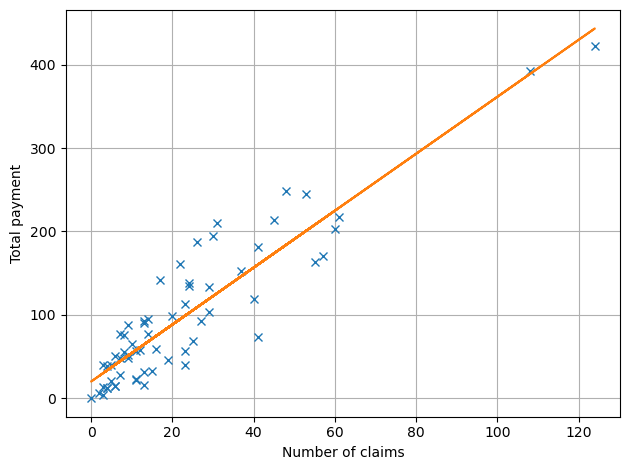

In [37]:
rmse = evaluate_simple_linear_regression(dataset)

print('Root Mean Square Error: %.3f' % rmse)
visualise_dataset(dataset)

Now test the linear regression algorithm on 'insurance' dataset. The first step to load and prepare the insurance data. Then, implement linear regession model on insurance dataset by using the regrsssion function created above and evaluate it.

In [38]:
seed(1)

Load and prepare data

In [39]:
filename = 'insurance.csv'
dataset = functions.load_csv(filename)

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

Evaluate the model

In [40]:
split = 0.6
rmse = evaluate_simple_linear_regression(dataset,split)

print('Root Mean Square Error: %.3f' % rmse)
visualise_dataset(dataset)

63
25


IndexError: list index out of range